
--- Raw Dataset Info ---
Shape: (445132, 40)

Missing values:
State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage            

count    403054.000000
mean         83.074470
std          21.448173
min          22.680000
25%          68.040000
50%          80.740000
75%          95.250000
max         292.570000
Name: WeightInKilograms, dtype: float64
Cleaned Data:
count    246022.000000
mean         83.615179
std          21.323156
min          28.120000
25%          68.040000
50%          81.650000
75%          95.250000
max         292.570000
Name: WeightInKilograms, dtype: float64

Column: BMI
Raw Data:
count    396326.000000
mean         28.529842
std           6.554889
min          12.020000
25%          24.130000
50%          27.440000
75%          31.750000
max          99.640000
Name: BMI, dtype: float64
Cleaned Data:
count    246022.000000
mean         28.668136
std           6.513973
min          12.020000
25%          24.270000
50%          27.460000
75%          31.890000
max          97.650000
Name: BMI, dtype: float64

--- Categorical Columns Value Counts Comparison ---

Column: State
Raw Data:
Sta

CovidPos
No                                                               270055
Yes                                                              110877
NaN                                                               50764
Tested positive using home test without a health professional     13436
Name: count, dtype: int64
Cleaned Data:
CovidPos
No                                                               167306
Yes                                                               70324
Tested positive using home test without a health professional      8392
Name: count, dtype: int64


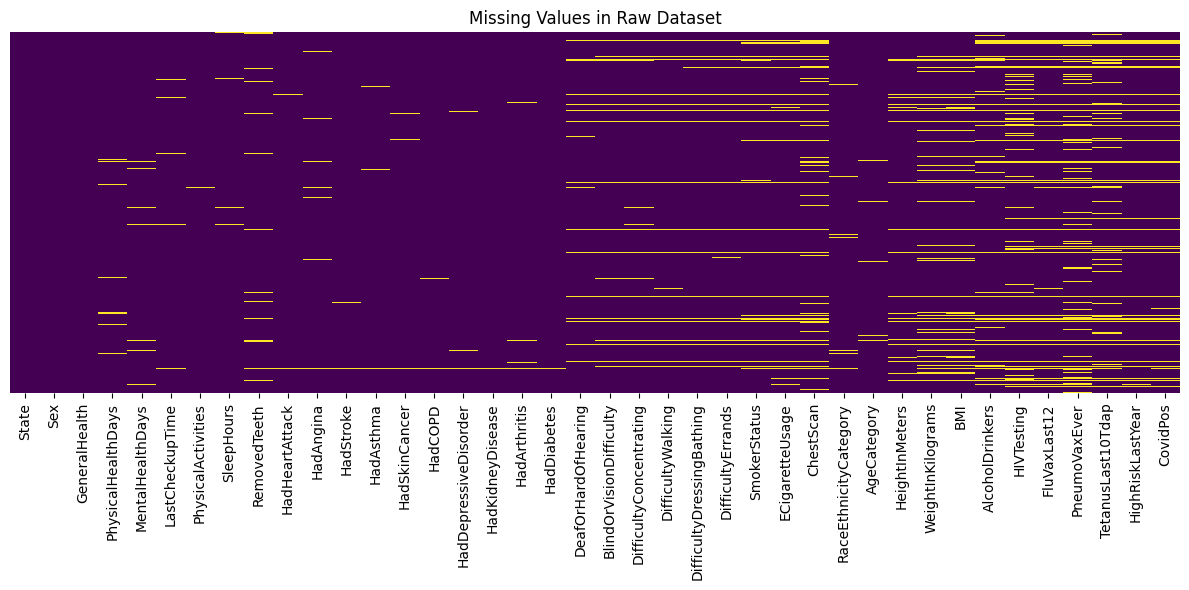

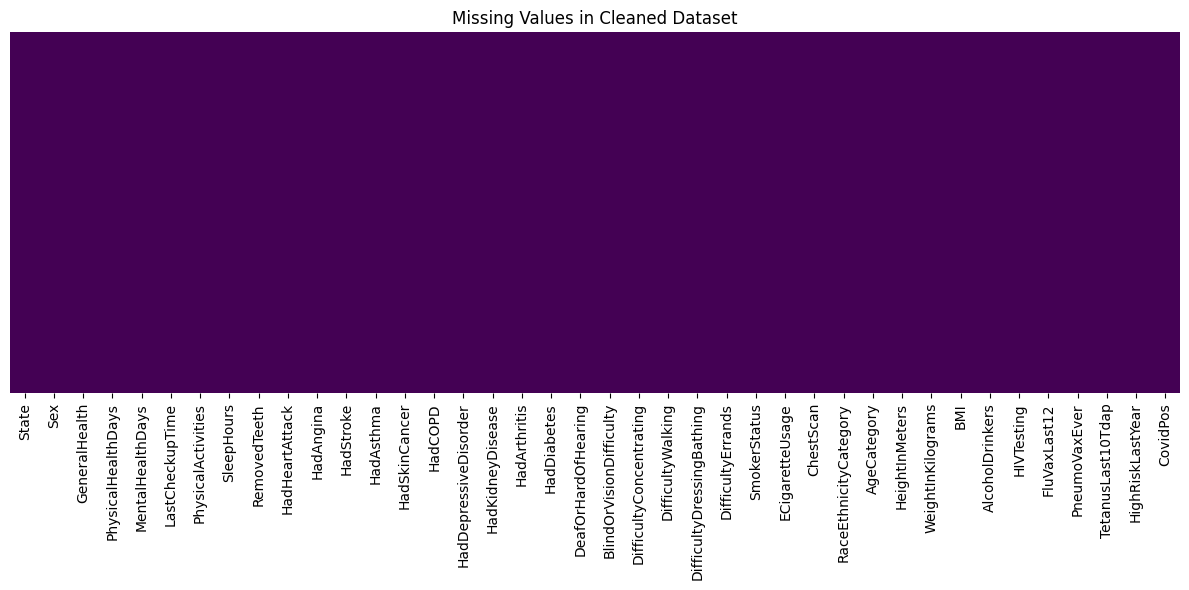

/Users/moiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/moiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


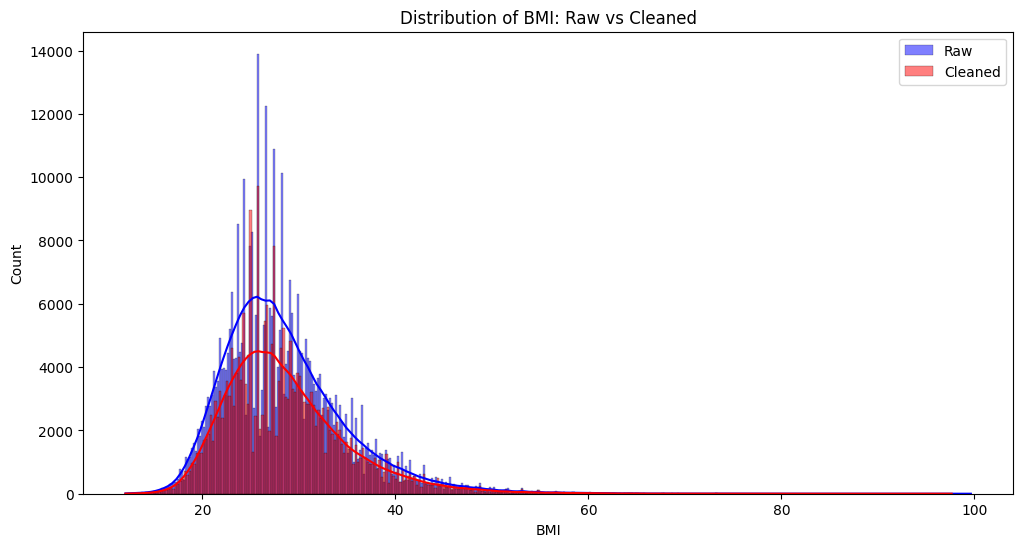

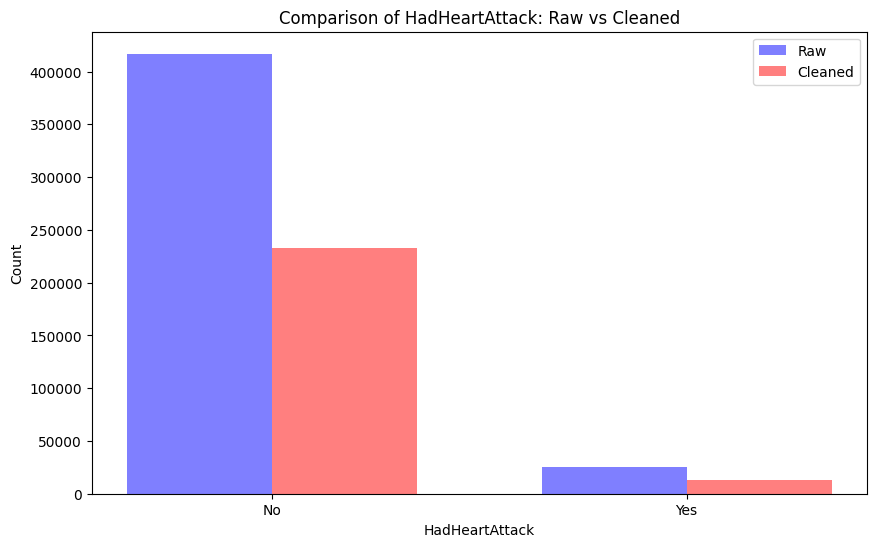


--- Summary of Changes ---
Number of rows: Raw 445132, Cleaned 246022
Number of columns: Raw 40, Cleaned 40
Total missing values: Raw 902665, Cleaned 0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw data
raw_df = pd.read_csv('/Users/moiz/Downloads/archive (2)/2022/heart_2022_with_nans.csv')

# Load the cleaned data
cleaned_df = pd.read_csv('/Users/moiz/Desktop/IntrotoAI/cleaned_data.csv')

# Function to get dataset info
def get_dataset_info(df, name):
    print(f"\n--- {name} Dataset Info ---")
    print(f"Shape: {df.shape}")
    print(f"\nMissing values:\n{df.isnull().sum()}")
    print(f"\nData types:\n{df.dtypes}")
    
# Compare dataset info
get_dataset_info(raw_df, "Raw")
get_dataset_info(cleaned_df, "Cleaned")

# Compare basic statistics for numeric columns
print("\n--- Numeric Columns Statistics Comparison ---")
numeric_columns = raw_df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if col in cleaned_df.columns:
        print(f"\nColumn: {col}")
        print("Raw Data:")
        print(raw_df[col].describe())
        print("Cleaned Data:")
        print(cleaned_df[col].describe())

# Compare basic statistics for numeric columns
print("\n--- Numeric Columns Statistics Comparison ---")
numeric_columns = raw_df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if col in cleaned_df.columns:
        print(f"\nColumn: {col}")
        print("Raw Data:")
        print(raw_df[col].describe())
        print("Cleaned Data:")
        print(cleaned_df[col].describe())

# Compare value counts for categorical columns
print("\n--- Categorical Columns Value Counts Comparison ---")
categorical_columns = raw_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col in cleaned_df.columns:
        print(f"\nColumn: {col}")
        print("Raw Data:")
        print(raw_df[col].value_counts(dropna=False))
        print("Cleaned Data:")
        print(cleaned_df[col].value_counts(dropna=False))

# Visualize the difference in missing values
plt.figure(figsize=(12, 6))
sns.heatmap(raw_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in Raw Dataset')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(cleaned_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in Cleaned Dataset')
plt.tight_layout()
plt.show()

# Compare distributions of a key numeric variable (e.g., BMI)
plt.figure(figsize=(12, 6))
sns.histplot(data=raw_df, x='BMI', kde=True, color='blue', alpha=0.5, label='Raw')
sns.histplot(data=cleaned_df, x='BMI', kde=True, color='red', alpha=0.5, label='Cleaned')
plt.title('Distribution of BMI: Raw vs Cleaned')
plt.legend()
plt.show()

# Compare the count of a key categorical variable (e.g., HadHeartAttack)
plt.figure(figsize=(10, 6))
raw_heart_attack = raw_df['HadHeartAttack'].value_counts()
cleaned_heart_attack = cleaned_df['HadHeartAttack'].value_counts()

x = range(len(raw_heart_attack))
width = 0.35

plt.bar([i - width/2 for i in x], raw_heart_attack.values, width, label='Raw', color='blue', alpha=0.5)
plt.bar([i + width/2 for i in x], cleaned_heart_attack.values, width, label='Cleaned', color='red', alpha=0.5)

plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.title('Comparison of HadHeartAttack: Raw vs Cleaned')
plt.xticks(x, raw_heart_attack.index)
plt.legend()
plt.show()

# Print summary of changes
print("\n--- Summary of Changes ---")
print(f"Number of rows: Raw {raw_df.shape[0]}, Cleaned {cleaned_df.shape[0]}")
print(f"Number of columns: Raw {raw_df.shape[1]}, Cleaned {cleaned_df.shape[1]}")
print(f"Total missing values: Raw {raw_df.isnull().sum().sum()}, Cleaned {cleaned_df.isnull().sum().sum()}")